<a href="https://colab.research.google.com/github/AKSHIT3107/assignment1/blob/main/assg5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        17
           1       0.65      1.00      0.79        13

    accuracy                           0.77        30
   macro avg       0.82      0.79      0.76        30
weighted avg       0.85      0.77      0.76        30


Confusion Matrix:
[[10  7]
 [ 0 13]]


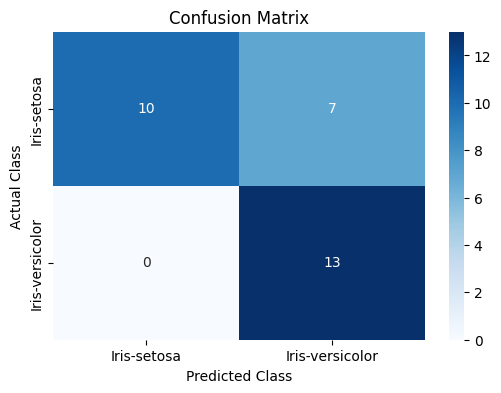

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/iris.data (1).csv'
iris_data = pd.read_csv(file_path, header=None)

X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

label_mapping = {label: idx for idx, label in enumerate(iris_data[4].unique())}
y = pd.Series(y).map(label_mapping).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



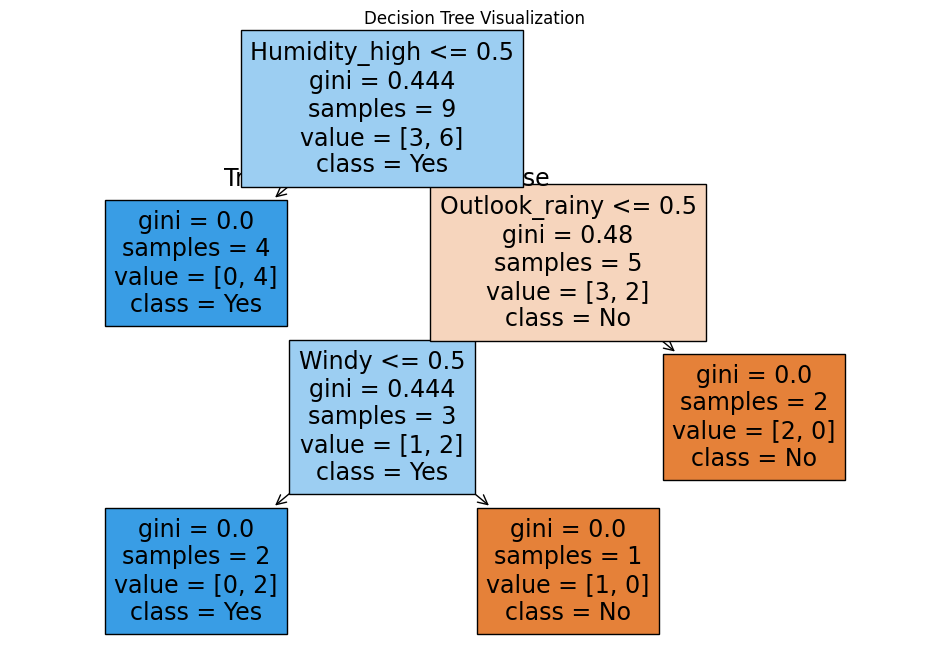

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


file_path = '/content/weather.csv'
weather_data = pd.read_csv(file_path)

categorical_features = ['Outlook', 'Temp', 'Humidity']
binary_features = ['Windy']
target = 'Play'

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(weather_data[categorical_features])

X = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X['Windy'] = weather_data[binary_features].values
y = weather_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Accuracy: 98.79%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



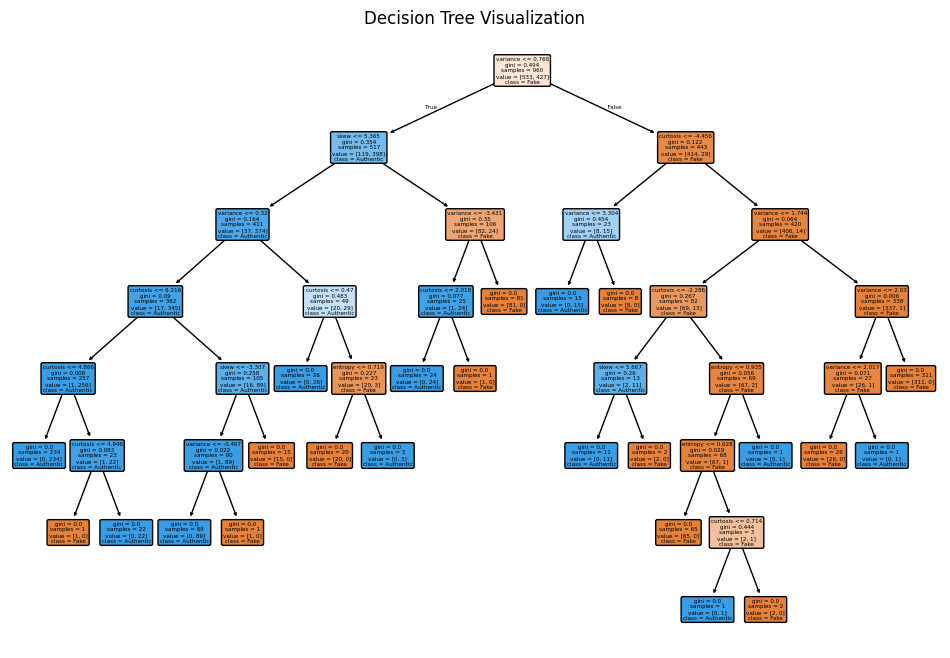

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

file_path = '/content/banknote-authentication.csv'
dataset = pd.read_csv(file_path)

X = dataset.drop(columns=['class'])
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Fake', 'Authentic'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
